# Name - Gaurav Nitin More
# Data Science Intern @ Oasis Infobyte

## Task 5
## Name of Project : SALES PREDICTION USING PYTHON

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

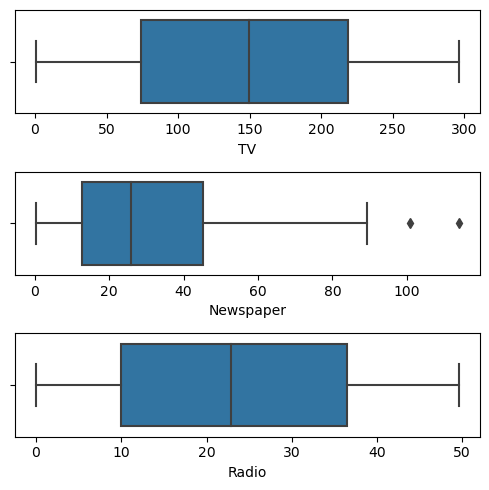

In [10]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

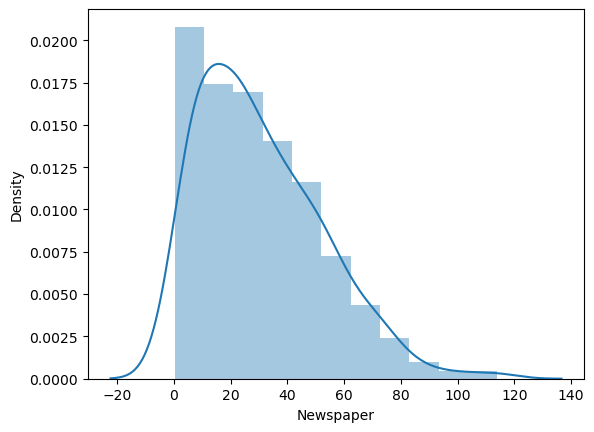

In [11]:
sns.distplot(df['Newspaper'])

In [12]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [13]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [14]:
data = df.copy()

In [15]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<AxesSubplot:xlabel='Newspaper'>

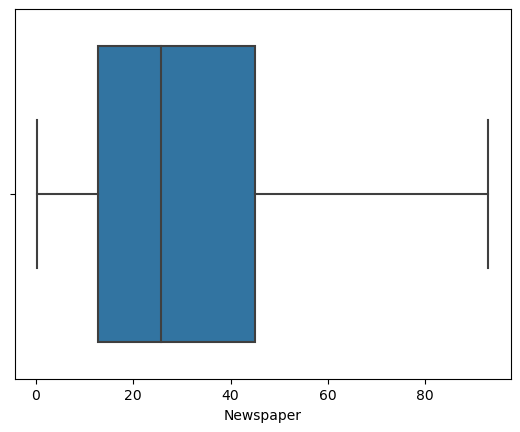

In [16]:
sns.boxplot(data['Newspaper'])

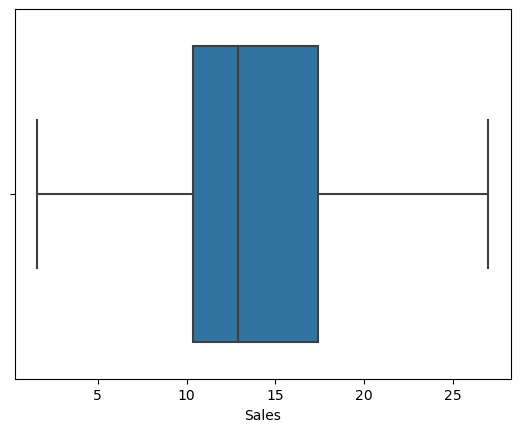

In [17]:
sns.boxplot(data['Sales']);

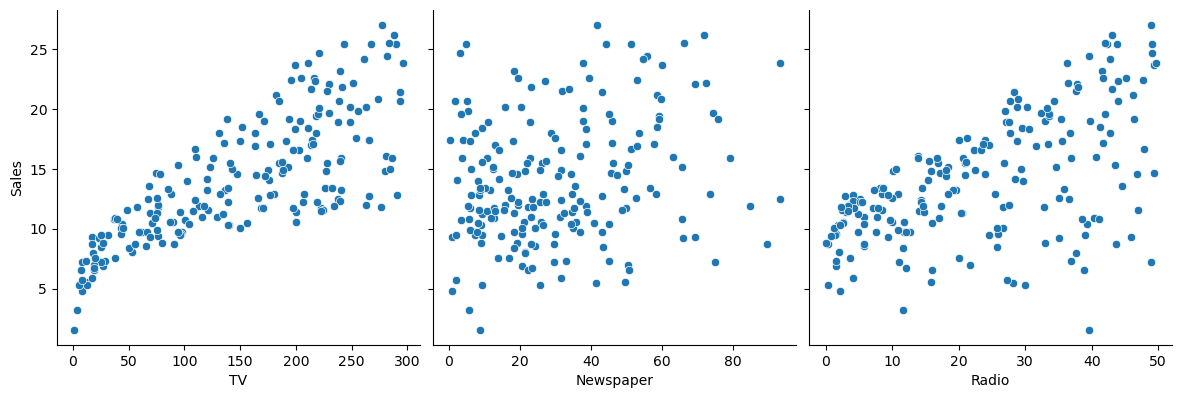

In [18]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

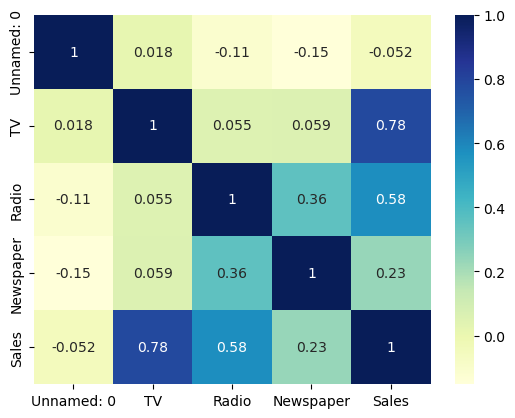

In [19]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [20]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [21]:
print(important_features)

['TV', 'Radio', 'Sales']


In [22]:
X = data['TV']
y = data['Sales']

In [23]:
X = X.values.reshape(-1,1)

In [24]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [25]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [26]:
print(X.shape,y.shape)

(200, 1) (200,)


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [28]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [29]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [31]:
knn_train_pred = knn.predict(X_train)

In [32]:
knn_test_pred = knn.predict(X_test)

In [33]:
print(knn_train_pred, knn_test_pred)

[ 9.6  17.32 12.36 11.12 15.3  17.3  11.12  7.84 19.08 18.1  13.22 19.68
 13.22  9.72 11.3   5.32 19.88 17.3  15.1  20.22 19.74 15.34 13.   13.22
 11.3  18.1  15.34 15.28 19.4   6.46  9.72 11.24  9.6  19.16 12.9  14.96
 12.54 11.26 12.9  17.3  12.2  11.12 15.42 11.14 10.48 10.6  10.38  9.18
 19.88  7.46 20.86 19.9  15.9   8.72 12.4   7.84 12.9   6.46 15.14 12.54
  8.26 12.36 12.38 19.04 10.26 19.74 10.46 10.48 13.22 17.4  10.2  17.4
 12.2  19.32 12.18 15.14 19.4   7.84 12.02  6.46  8.64 11.72 12.66 15.1
  8.64 20.54  6.46 11.3  11.72 19.88 14.6  19.08 19.76 20.2  16.78 18.9
 17.32 12.4  17.3   6.46 15.1  11.76 15.14 18.1  19.32 11.68 15.42 15.14
 20.86 15.28 17.3   8.64 19.32 17.46 11.14 11.14 19.16 12.38 16.06 15.3
 10.26 11.72 17.46 19.9   8.64 19.88  9.6   9.72 11.14 15.14 17.32 19.74
 15.28 11.12] [15.1  10.2  17.86 14.6  18.12 11.3   6.46 13.62 16.   14.96 19.32 15.9
 17.54 14.96 13.42 12.2  11.72 10.76 12.36 15.28 19.18 15.34 19.88 12.36
 15.68 13.62 19.32  5.32  8.26 15.14 14.96

In [34]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [35]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5627832355949116
RMSE: 3.5008778119987927


In [36]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.63002,0.562783,3.500878,0.067237


In [37]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [38]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [39]:
print(svr_train_pred,svr_test_pred)

[10.02543929 17.73259392 11.27295951 11.52696727 14.81763622 17.49978676
 11.53817013  8.47497478 16.82126589 17.26398219 12.53832072 17.02440475
 12.50705249  9.84582586 10.50598191  8.15329509 16.62887467 17.55154928
 14.72809417 17.20267311 17.69951536 17.71247728 12.02463782 12.51875783
 10.54038676 17.15898284 17.67911558 13.8145208  17.1329261   8.30487065
  9.61276465 11.76754319 10.11934612 17.17739991 13.40601519 14.98089969
 13.3132181  11.85200088 13.4814963  17.58427304 12.97599815 11.59401123
 15.30364816 10.40629397  9.11983866  9.22860402 10.99762131  8.90444552
 17.25170602  8.42626845 17.73931643 17.74686597 16.66409541  8.79596022
 12.11324875  8.49479042 13.35940114  8.24878046 16.49996201 13.3224203
  8.73158459 11.31522953 12.39124747 17.04268133  9.45331637 17.72633419
 10.239346    9.16550791 12.62125743 17.56575643 11.66068726 17.57214311
 13.08867992 17.30521495 11.21490786 16.53438511 17.12915537  8.4529228
 10.77280797  8.23404692  8.69003313 10.78941851 11.9

In [40]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5702193736032655
RMSE: 3.4709788513144892


In [41]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.630020,0.562783,3.500878,0.067237
1,Support Vector Machine,0.566151,0.570219,3.470979,-0.004068


In [42]:
import statsmodels.api as sm

In [43]:
X_train_constant = sm.add_constant(X_train)

In [44]:
model = sm.OLS(y_train, X_train_constant).fit()

In [45]:
model.params

const    7.408551
x1       0.045209
dtype: float64

In [46]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     187.1
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           4.46e-27
Time:                        19:50:19   Log-Likelihood:                -350.86
No. Observations:                 134   AIC:                             705.7
Df Residuals:                     132   BIC:                             711.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4086      0.562     13.176      0.0

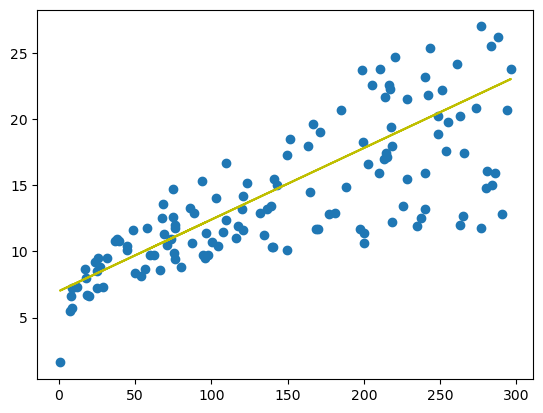

In [47]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [48]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

6      1.791910
47     4.945720
125   -0.750809
156    3.646288
173   -3.321810
         ...   
55     7.299304
146   -5.063322
169   -5.261576
157   -4.080916
144   -0.357693
Name: Sales, Length: 134, dtype: float64

In [49]:
y_train_pred

array([10.00809029, 18.25428011, 11.3508087 , 11.65371151, 15.02180987,
       19.39807727, 11.66727432,  8.25396658, 20.33843225, 19.78235695,
       12.87888554, 20.09882257, 12.84271804,  9.8272528 , 10.50087247,
        7.44019785, 20.55091631, 19.29409571, 14.94947487, 17.14665045,
       18.88269041, 18.14125667, 12.26403805, 12.85628085, 10.53703997,
       19.92702695, 18.01014949, 14.17639457, 17.06075263,  7.93750096,
        9.59216405, 11.94757244, 10.10302998, 17.11500388, 13.79663583,
       15.15291705, 13.70621708, 12.051554  , 13.86897083, 19.22176071,
       13.36262584, 11.73508838, 15.41061048, 10.39689091,  9.07677719,
        9.19432156, 11.03434308,  8.83264657, 17.20994357,  8.17258971,
       18.65664354, 18.40347104, 16.56344952,  8.70153938, 12.37254055,
        8.28561314, 13.75142646,  7.80187284, 16.40973765, 13.71525896,
        8.62016251, 11.40053901, 12.70708992, 20.07621788,  9.42941031,
       18.75158322, 10.22509529,  9.1265075 , 12.97382523, 17.71

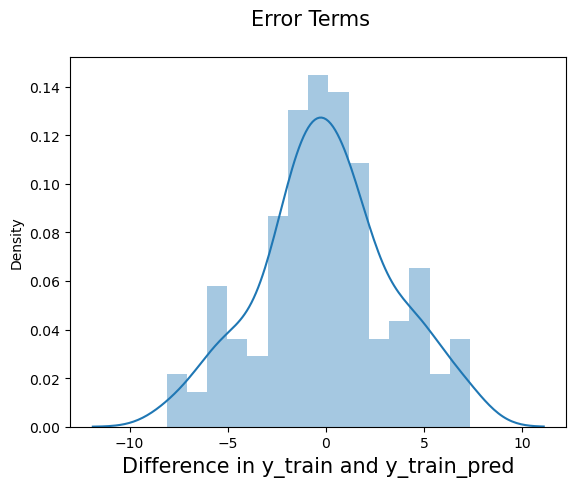

In [50]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

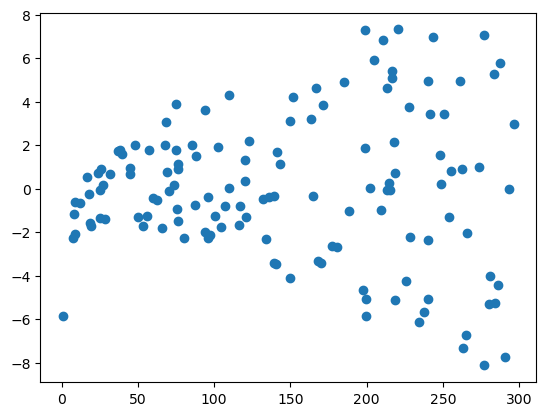

In [51]:
plt.scatter(X_train, res)
plt.show()

In [52]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [53]:
y_pred

array([14.89522362, 11.80290244, 16.04806266, 15.89887172, 20.50570693,
       10.52799809,  7.7973519 , 15.32471267, 16.16560703, 17.90164699,
       17.37721825, 16.63578452, 17.46311606, 17.81122824, 13.0913696 ,
       13.52085865, 10.81281715,  9.35707531, 11.4954787 , 14.06789208,
       16.75784983, 18.14125667, 20.65037693, 11.46383213, 14.48833925,
       15.3518383 , 17.34557169,  7.65268191,  8.65180907, 16.24246297,
       17.78410262,  8.18615252,  8.29465502, 18.22715448, 13.64292396,
       16.34192359, 12.51268961,  8.25848752, 16.93416639, 18.24975917,
       13.70169615, 20.13046913,  8.00531502, 16.76237077, 19.47493321,
        8.18615252, 14.79124206, 10.43305841,  9.35255437, 13.33550022,
        9.13554937, 16.14300234, 15.2071683 , 13.25864428, 15.76776454,
        8.00079409, 18.17742417, 15.41061048, 12.41322899, 17.68012106,
        7.59390972, 17.46311606, 15.90339266, 15.66378298, 10.94392433,
       17.53545106])

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [55]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.102769173718767

In [56]:
r2 = r2_score(y_test, y_pred)
r2

0.6565671486897786

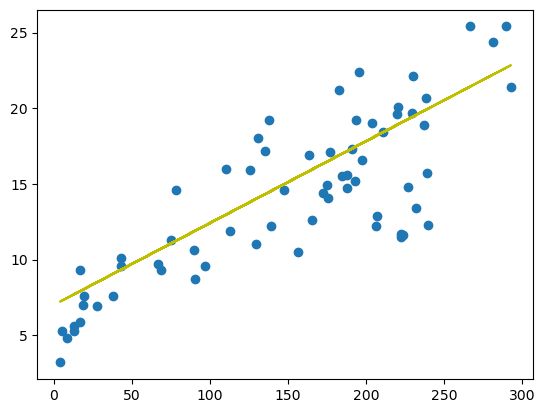

In [57]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()

# Thank You!